In [1]:
library(ggplot2)
library(car)
library(dplyr)

Loading required package: carData
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:car':

    recode

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# I. Comparing the means of two groups  
https://whitlockschluter3e.zoology.ubc.ca/Tutorials%20using%20R/R_tutorial_Comparing_means_of_2_groups.html

In [2]:
titanicData <- read.csv("ABDLabs/DataForLabs/titanic.csv") 
# full path = C:\AI\R-Shiny-Apps\R_Examples\ABDLabs\DataForLabs\titanic.csv

In [3]:
head(titanicData, 3)

passenger_class,name,age,embarked,home_destination,sex,survive
1st,"Allen,MissElisabethWalton",29,Southampton,"StLouis,MO",female,yes
1st,"Allison,MissHelenLoraine",2,Southampton,"Montreal,PQ/Chesterville,ON",female,no
1st,"Allison,MrHudsonJoshuaCreighton",30,Southampton,"Montreal,PQ/Chesterville,ON",male,no


## 1. Strip charts  
geom_jitter()

In [4]:
# Define size of graph
options(repr.plot.width = 3, repr.plot.height = 2.5)

Warning message:
"Removed 680 rows containing missing values (geom_point)."

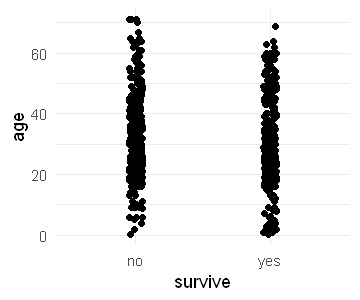

In [5]:
ggplot(titanicData, aes(x = survive, 
                        y = age)) + geom_jitter(position = position_jitter(0.05)) + theme_minimal()

## 2. Multiple histograms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 680 rows containing non-finite values (stat_bin)."

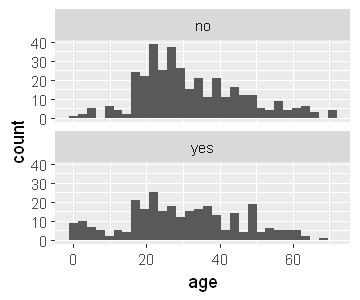

In [6]:
ggplot(titanicData, aes(x = age)) +   
    geom_histogram() + 
    facet_wrap(~ survive, ncol = 1)

## 3. Violin plots

Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"Removed 680 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 680 rows containing non-finite values (stat_summary)."

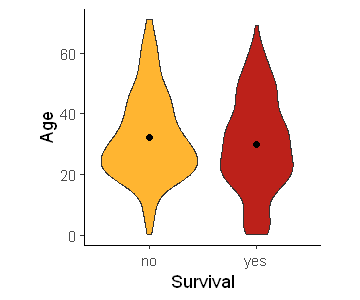

In [7]:
ggplot(titanicData, 
       aes(x = survive, 
           y=age, 
           fill = survive)) + 
  geom_violin() +
  xlab("Survival") + ylab("Age") + 
  theme_classic()+scale_fill_manual(values=c("#FFB531","#BC211A"))+ 
  stat_summary(fun.y=mean,  geom="point", color="black")+ 
  theme(legend.position="none")+ 
  theme(aspect.ratio=1)

# Note here Survival YES has one class so the distribution is symmetry. Similar to NO

## 4. Two-sample t-test: to compare the means of two groups   

A t-test is a statistical test that compares the means of two samples. <b> It is used in hypothesis testing, with a null hypothesis that the difference in group means is zero </b> and an alternate hypothesis that the difference in group means is different from zero.

- <b>p-value smaller than or equal to 0.05 indicates strong evidence against the null hypothesis, so it should be rejected; </b>
- p-value larger than 0.05 indicated weak evidence against the null- hypothesis, so it cannot be rejected;
- p-value very close to 0.05 means it can go either way.

For a 2-sample t-test, two variables are used, one categorical and one numerical.  
Eg. x has A or B (studyCode or Control) and y is real value (eg. water drink,...) corresponding of each individual


### 4.1 Common t-test

In [8]:
t.test(data = titanicData, # data frames whic has age (real value) and survive (categorical) columns
       age ~ survive,  
       var.equal = TRUE # assume that the variances of the two groups (YES or NO survival) are EQUAL
      )
# Output below: The output gives us the test statistic t, the degrees of freedom for the test (df),
# and the P-value for the test of equal population means (which in this case is P = 0.044).




	Two Sample t-test

data:  age by survive
t = 2.0173, df = 631, p-value = 0.04409
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.06300333 4.68528476
sample estimates:
 mean in group no mean in group yes 
         32.24811          29.87396 


### 4.2 Welch’s t-test: Welch’s t-test (with var.equal = FALSE) is actually the default for t.test().

In [9]:
t.test(data = titanicData, 
       age ~ survive, 
       var.equal = FALSE # NOT assume that the variances of the two groups (YES or NO survival) are EQUAL
      )


	Welch Two Sample t-test

data:  age by survive
t = 1.9947, df = 570.96, p-value = 0.04655
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.03644633 4.71184176
sample estimates:
 mean in group no mean in group yes 
         32.24811          29.87396 


## 5. Paired t-test  
The function t.test() can also perform paired t-tests. <b> Remember, a paired t-test is used when each data point in one group is paired meaningfully with a data point in the other group. </b>  
The Titanic data set does not include any paired data so we will use other datasets

In [10]:
blackbird <- read.csv("ABDLabs/DataForLabs/chap12e2BlackbirdTestosterone.csv")
head(blackbird, 3)

blackbird,beforeImplant,afterImplant,logBeforeImplant,logAfterImplant
1,105,85,4.65,4.44
2,50,74,3.91,4.30
3,136,145,4.91,4.98


These data show the log antibody production of male blackbirds before <b>(logBeforeImplant)</b> and after <b>(logAfterImplant)</b> the birds received a testosterone implant. There is a before and after measure for each bird, so the data are paired.

In [11]:
t.test(blackbird$logAfterImplant, 
       blackbird$logBeforeImplant, 
       paired = TRUE)


	Paired t-test

data:  blackbird$logAfterImplant and blackbird$logBeforeImplant
t = 1.2714, df = 12, p-value = 0.2277
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04007695  0.15238464
sample estimates:
mean of the differences 
             0.05615385 


## 6. Levene’s test: to compare the variances of two or more groups  
The basic version of R does not do Levene’s test, but it is available from the package car with the function leveneTest().

In [12]:
leveneTest(data = titanicData, 
           age ~ survive, 
           center = mean # how to calculate the center of each group. 
                         # For the standard Levene’s test, use center = mean
          )

# Below output
# the P-value of Levene’s test is P = 0.04855. 
# We would reject the null hypothesis that the group that survived and 
# the group that died had the same population variances for the variable age.

,Df,F value,Pr(>F)
group,1,3.905995,0.0485492
,631,NA,NA


# II. Analysis of variance (ANOVA): compare the means of multiple groups

## 1. ANOVA to compare the means of multiple groups

In [13]:
head(titanicData, 3)

passenger_class,name,age,embarked,home_destination,sex,survive
1st,"Allen,MissElisabethWalton",29,Southampton,"StLouis,MO",female,yes
1st,"Allison,MissHelenLoraine",2,Southampton,"Montreal,PQ/Chesterville,ON",female,no
1st,"Allison,MrHudsonJoshuaCreighton",30,Southampton,"Montreal,PQ/Chesterville,ON",male,no


#### passenger_class has 3 classess

In [14]:
unique(titanicData$passenger_class)

[1] 1st 2nd 3rd
Levels: 1st 2nd 3rd

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 680 rows containing non-finite values (stat_bin)."

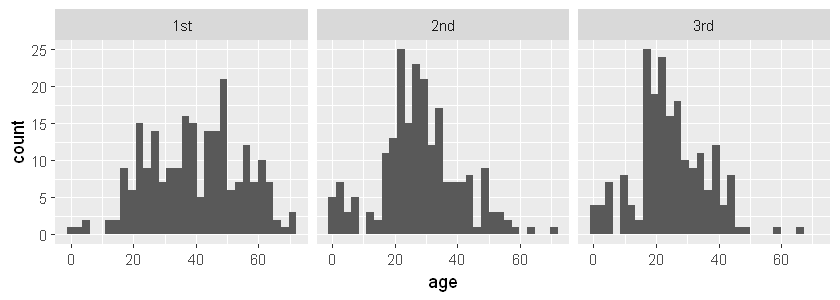

In [15]:
options(repr.plot.width = 7, repr.plot.height = 2.5)
ggplot(titanicData, 
       aes(x = age)) +   
      geom_histogram() + 
      facet_wrap(~passenger_class, ncol = 3) 

# The below data look sufficiently normal and with similar spreads that ANOVA would be appropriate.

In [16]:
# To confirm these visual impressions, it would be useful to construct a table of 
# the means and standard deviations of each group.

# First, use group_by() to organize your data frame by the appropriate grouping variable. 
# For example, here we want to organize the titanicData by passenger_class:

titanic_by_passenger_class <- group_by(titanicData, passenger_class)
head (titanic_by_passenger_class, 3)

passenger_class,name,age,embarked,home_destination,sex,survive
1st,"Allen,MissElisabethWalton",29,Southampton,"StLouis,MO",female,yes
1st,"Allison,MissHelenLoraine",2,Southampton,"Montreal,PQ/Chesterville,ON",female,no
1st,"Allison,MrHudsonJoshuaCreighton",30,Southampton,"Montreal,PQ/Chesterville,ON",male,no


In [17]:
# After applying group_by() to a data frame, we can summarize the data using summarise()
summarise(titanic_by_passenger_class, 
          group_mean = mean(age, na.rm=TRUE) # Can apply mean(), median(), var()
                                             # group_mean to be the column name after calling
         )

passenger_class,group_mean
1st,39.66777
2nd,28.30031
3rd,24.51966


In [18]:
summarise(titanic_by_passenger_class, 
          group_mean = mean(age, na.rm=TRUE), # group_mean column
          group_sd = sd(age, na.rm=TRUE)      # group_sd column
         )
# Note that the standard deviations are very similar, which means that
# these data fit the equal variance assumption of ANOVA.

passenger_class,group_mean,group_sd
1st,39.66777,14.93044
2nd,28.30031,13.00764
3rd,24.51966,11.33059


### ANOVA: 2 steps
Doing ANOVA takes at least two steps. First, we fit the ANOVA model to the data using the function lm(). This step carries out a bunch of intermediate calculations. Second, we use the results of first step to do the ANOVA calculations and place them in an ANOVA table using the function anova(). The function name lm() stands for “linear model”; this is actually a very powerful function that allows a variety of calculations. One-way ANOVA is a type of linear model.

#### Step 1. lm()

In [19]:
titanicANOVA <- lm(data = titanicData, 
                   age ~ passenger_class  # age is real value, passenger_class is categorical
                  )
titanicANOVA


Call:
lm(formula = age ~ passenger_class, data = titanicData)

Coefficients:
       (Intercept)  passenger_class2nd  passenger_class3rd  
             39.67              -11.37              -15.15  


#### Step 2: anova()  
The function anova() takes the results of lm() as input and returns an ANOVA table as output:

In [20]:
anova(titanicANOVA)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
passenger_class,2,26689.69,13344.8450,75.90261,2.925659e-30
Residuals,630,110763.68,175.8154,NA,NA


This table shows the results of a test of the null hypothesis that the mean ages are the same among the three groups. The P-value is very small, and so we reject the null hypothesis of no differences in mean age among the passenger classes. 
-> Meaning that the mean difference amongst passenger class is significant

## 2. Tukey-Kramer test  
A single-factor ANOVA can tell us that at least one group has a different mean from another group, but it does not inform us which group means are different from which other group means. A Tukey-Kramer test lets us test the null hypothesis of no difference between the population means for all pairs of groups. The Tukey-Kramer test (also known as a Tukey Honest Significance Test, or Tukey HSD), is implemented in R in the function TukeyHSD().  
We will use the results of an ANOVA done with lm() as above, that we stored in the variable titanicANOVA. To do a Tukey-Kramer test on these data, we need to first apply the function aov() to titanicANOVA, and then we need to apply the function TukeyHSD to the result. We can do this in a single command:

In [21]:
TukeyHSD(aov(titanicANOVA))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = titanicANOVA)

$passenger_class
              diff        lwr        upr     p adj
2nd-1st -11.367459 -14.345803  -8.389115 0.0000000
3rd-1st -15.148115 -18.192710 -12.103521 0.0000000
3rd-2nd  -3.780656  -6.871463  -0.689849 0.0116695


The key part of this output is the table at the bottom. It estimates the difference between the means of groups (for example, the 2nd passenger class compared to the 1st passenger class) and calculates a 95% confidence interval for the difference between the corresponding population means. (“lwr” and “upr” correspond to the lower and upper bounds of that confidence interval for the difference in means.) Finally, it give the P-value from a test of the null hypothesis of no difference between the means (the column headed with “p adj”). In the case of the Titanic data, P is less than 0.05 in all pairs, and we therefore reject every null hypothesis. We conclude that the population mean ages of all passenger classes are significantly different from each other.

## 3. Kruskal-Wallis test  
A Kruskal-Wallis test is a non-parametric analog of a one-way ANOVA. It does not assume that the variable has a normal distribution. (Instead, it tests whether the variable has the same distribution with the same mean in each group.)  
To run a Kruskal-Wallis test, use the R function kruskal.test(). The input for this function is the same as we used for lm() above. It includes a model formula statement and the name of the data frame to be used.

In [22]:
kruskal.test(data = titanicData, age ~ passenger_class)


	Kruskal-Wallis rank sum test

data:  age by passenger_class
Kruskal-Wallis chi-squared = 116.08, df = 2, p-value < 2.2e-16


You can see for the output that a Kruskal-Wallis test also strongly rejects the null hypothesis of equality of age for all passenger class groups with the Titanic data.